In [1]:
import numpy as np
import pandas as pd

import sklearn
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
pesticides_data = pd.read_csv("/content/pesticides.csv",sep=',')
rainfall_data = pd.read_csv("/content/rainfall.csv",sep=',')
temperature_data = pd.read_csv("/content/temp.csv",sep=',')
yield_data = pd.read_csv("/content/yield.csv",sep=',')

In [3]:
def clean_column_names(df):
    df.columns = df.columns.str.strip()
    return df

# Clean column names for each DataFrame
pesticides_data = clean_column_names(pesticides_data)
rainfall_data = clean_column_names(rainfall_data)
temperature_data = clean_column_names(temperature_data)
yield_data = clean_column_names(yield_data)

In [4]:
rainfall_data

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,2.03926,2016,Aug Average,Zimbabwe,ZWE
272828,0.48070,2016,Sep Average,Zimbabwe,ZWE
272829,9.13410,2016,Oct Average,Zimbabwe,ZWE
272830,72.95080,2016,Nov Average,Zimbabwe,ZWE


In [5]:
rainfall_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   Rainfall - (MM)  272832 non-null  float64
 1   Year             272832 non-null  int64  
 2   Statistics       272832 non-null  object 
 3   Country          272832 non-null  object 
 4   ISO3             272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [6]:
rainfall_data.describe()

,Rainfall - (MM),Year
count,272832.000000,272832.000000
mean,103.470868,1958.500000
std,113.231867,33.485133
min,0.000000,1901.000000
25%,24.168375,1929.750000
50%,66.431550,1958.500000
75%,149.647250,1987.250000
max,2699.190000,2016.000000


In [7]:
# Number of countries
len(rainfall_data['Country'].unique())

196

In [8]:
# Number of years (1901 - 2016)
len(rainfall_data['Year'].unique())

116

In [9]:
# One year from Afghanistan
rainfall_data.head(12)

,Rainfall - (MM),Year,Statistics,Country,ISO3
0,55.74480,1901,Jan Average,Afghanistan,AFG
1,13.94800,1901,Feb Average,Afghanistan,AFG
2,43.84640,1901,Mar Average,Afghanistan,AFG
3,26.96100,1901,Apr Average,Afghanistan,AFG
4,52.95790,1901,May Average,Afghanistan,AFG
5,16.64650,1901,Jun Average,Afghanistan,AFG
6,7.38656,1901,Jul Average,Afghanistan,AFG
7,0.59306,1901,Aug Average,Afghanistan,AFG
8,4.82593,1901,Sep Average,Afghanistan,AFG
9,11.49720,1901,Oct Average,Afghanistan,AFG


In [10]:
# Rain data in years for each country
rainfall_df = rainfall_data.groupby(['Year', 'Country', 'ISO3'],as_index=False)['Rainfall - (MM)'].sum()
rainfall_df

,Year,Country,ISO3,Rainfall - (MM)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
22731,2016,Venezuela,VEN,1844.70330
22732,2016,Vietnam,VNM,1988.86180
22733,2016,Yemen,YEM,171.48137
22734,2016,Zambia,ZMB,803.47810


In [11]:
temperature_data

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
...,...,...,...,...,...
272827,18.75550,2016,Aug Average,Zimbabwe,ZWE
272828,22.99190,2016,Sep Average,Zimbabwe,ZWE
272829,25.86640,2016,Oct Average,Zimbabwe,ZWE
272830,25.85150,2016,Nov Average,Zimbabwe,ZWE


In [12]:
temperature_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272832 entries, 0 to 272831
Data columns (total 5 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Temperature - (Celsius)  272832 non-null  float64
 1   Year                     272832 non-null  int64  
 2   Statistics               272832 non-null  object 
 3   Country                  272832 non-null  object 
 4   ISO3                     272832 non-null  object 
dtypes: float64(1), int64(1), object(3)
memory usage: 10.4+ MB


In [13]:
temperature_data.describe()

,Temperature - (Celsius),Year
count,272832.000000,272832.000000
mean,18.631498,1958.500000
std,10.248635,33.485133
min,-34.121000,1901.000000
25%,13.231575,1929.750000
50%,22.736300,1958.500000
75%,25.797700,1987.250000
max,38.566900,2016.000000


In [14]:
# Number of countries
len(temperature_data['Country'].unique())

196

In [15]:
# Number of years (1901 - 2016)
len(temperature_data['Year'].unique())

116

In [16]:
# One year from Afghanistan
temperature_data.head(12)

,Temperature - (Celsius),Year,Statistics,Country,ISO3
0,-0.03780,1901,Jan Average,Afghanistan,AFG
1,2.42348,1901,Feb Average,Afghanistan,AFG
2,9.36230,1901,Mar Average,Afghanistan,AFG
3,13.55640,1901,Apr Average,Afghanistan,AFG
4,18.15090,1901,May Average,Afghanistan,AFG
5,22.17270,1901,Jun Average,Afghanistan,AFG
6,25.37870,1901,Jul Average,Afghanistan,AFG
7,23.66520,1901,Aug Average,Afghanistan,AFG
8,19.46550,1901,Sep Average,Afghanistan,AFG
9,11.28370,1901,Oct Average,Afghanistan,AFG


In [17]:
# Average temperature data in years for each country
temperature_df =temperature_data.groupby(['Year', 'Country', 'ISO3'], as_index=False, axis=0)['Temperature - (Celsius)'].mean()
temperature_df

,Year,Country,ISO3,Temperature - (Celsius)
0,1901,Afghanistan,AFG,13.172872
1,1901,Albania,ALB,11.030938
2,1901,Algeria,DZA,22.290008
3,1901,Andorra,AND,9.960649
4,1901,Angola,AGO,21.365725
...,...,...,...,...
22731,2016,Venezuela,VEN,26.478200
22732,2016,Vietnam,VNM,25.073158
22733,2016,Yemen,YEM,24.221200
22734,2016,Zambia,ZMB,22.737050


In [18]:
yield_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Barley,1961,hg/ha,10800
1,Crops,Afghanistan,Yield,Barley,1962,hg/ha,10800
2,Crops,Afghanistan,Yield,Barley,1963,hg/ha,10800
3,Crops,Afghanistan,Yield,Barley,1964,hg/ha,10857
4,Crops,Afghanistan,Yield,Barley,1965,hg/ha,10857
...,...,...,...,...,...,...,...
63686,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486
63687,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,19013
63688,Crops,Zimbabwe,Yield,Wheat,2017,hg/ha,17542
63689,Crops,Zimbabwe,Yield,Wheat,2018,hg/ha,16379


In [19]:
yield_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 63691 entries, 0 to 63690
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   63691 non-null  object
 1   Area     63691 non-null  object
 2   Element  63691 non-null  object
 3   Item     63691 non-null  object
 4   Year     63691 non-null  int64 
 5   Unit     63691 non-null  object
 6   Value    63691 non-null  int64 
dtypes: int64(2), object(5)
memory usage: 3.4+ MB


In [20]:
yield_data.describe()

,Year,Value
count,63691.000000,6.369100e+04
mean,1992.332669,8.581113e+04
std,16.888797,1.008880e+05
min,1961.000000,0.000000e+00
25%,1978.000000,1.770700e+04
50%,1994.000000,4.705900e+04
75%,2007.000000,1.185070e+05
max,2019.000000,2.236842e+06


In [21]:
# Number of countries
len(yield_data['Area'].unique())

203

In [22]:
# Number of years (1961 - 2019)
len(yield_data['Year'].unique())

59

In [23]:
yield_df = yield_data.drop(['Domain', 'Element'], axis=1)
yield_df

,Area,Item,Year,Unit,Value
0,Afghanistan,Barley,1961,hg/ha,10800
1,Afghanistan,Barley,1962,hg/ha,10800
2,Afghanistan,Barley,1963,hg/ha,10800
3,Afghanistan,Barley,1964,hg/ha,10857
4,Afghanistan,Barley,1965,hg/ha,10857
...,...,...,...,...,...
63686,Zimbabwe,Wheat,2015,hg/ha,20486
63687,Zimbabwe,Wheat,2016,hg/ha,19013
63688,Zimbabwe,Wheat,2017,hg/ha,17542
63689,Zimbabwe,Wheat,2018,hg/ha,16379


In [24]:
pesticides_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1990,tonnes,121
1,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1991,tonnes,121
2,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1992,tonnes,121
3,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1993,tonnes,121
4,Pesticides Use,Albania,Agricultural Use,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...,...,...
4784,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2014,tonnes,2185
4785,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2015,tonnes,2185
4786,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2016,tonnes,2185
4787,Pesticides Use,Zimbabwe,Agricultural Use,Pesticides (total),2017,tonnes,2185


In [25]:
pesticides_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4789 entries, 0 to 4788
Data columns (total 7 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Domain   4789 non-null   object
 1   Area     4789 non-null   object
 2   Element  4789 non-null   object
 3   Item     4789 non-null   object
 4   Year     4789 non-null   int64 
 5   Unit     4789 non-null   object
 6   Value    4789 non-null   int64 
dtypes: int64(2), object(5)
memory usage: 262.0+ KB


In [26]:
pesticides_data.describe()

,Year,Value
count,4789.000000,4.789000e+03
mean,2004.142619,2.894718e+04
std,8.302595,1.627207e+05
min,1990.000000,0.000000e+00
25%,1997.000000,9.900000e+01
50%,2004.000000,1.221000e+03
75%,2011.000000,7.420000e+03
max,2018.000000,1.815690e+06


In [27]:
# Number of countries
len(pesticides_data['Area'].unique())

172

In [28]:
# Number of years (1990 - 2018)
len(pesticides_data['Year'].unique())

29

In [29]:
# Remove unnecessary columns
pesticides_df = pesticides_data.drop(['Domain', 'Element'], axis=1)
pesticides_df

,Area,Item,Year,Unit,Value
0,Albania,Pesticides (total),1990,tonnes,121
1,Albania,Pesticides (total),1991,tonnes,121
2,Albania,Pesticides (total),1992,tonnes,121
3,Albania,Pesticides (total),1993,tonnes,121
4,Albania,Pesticides (total),1994,tonnes,201
...,...,...,...,...,...
4784,Zimbabwe,Pesticides (total),2014,tonnes,2185
4785,Zimbabwe,Pesticides (total),2015,tonnes,2185
4786,Zimbabwe,Pesticides (total),2016,tonnes,2185
4787,Zimbabwe,Pesticides (total),2017,tonnes,2185


In [30]:
rainfall_df.rename({'Rainfall - (MM)': 'Rainfall (mm)'}, axis=1, inplace=True)
temperature_df.rename({'Temperature - (Celsius)': 'Temperature (Celsius)'}, axis=1, inplace=True)
yield_df.rename({'Area': 'Country', 'Value': 'Yield (hg/ha)'}, axis=1, inplace=True)
yield_df.drop('Unit', axis=1, inplace=True)
pesticides_df.rename({'Area': 'Country', 'Value': 'Pesticides (tonnes)'}, axis=1, inplace=True)
pesticides_df.drop(['Unit', 'Item'], axis=1, inplace=True)

In [40]:
rain_temp_df = pd.merge(rainfall_df, temperature_df, on=['Year', 'ISO3'])
rain_temp_yield_df = pd.merge(rain_temp_df, yield_df, on=['Year'])
rain_temp_yield_pest_df = pd.merge(rain_temp_yield_df, pesticides_df, on=['Country', 'Year'])
rain_temp_yield_pest_df.drop('ISO3', axis=1, inplace=True)
data = rain_temp_yield_pest_df[['Year', 'Country', 'Item', 'Rainfall (mm)', 'Temperature (Celsius)', 'Pesticides (tonnes)', 'Yield (hg/ha)']]
data

,Year,Country,Item,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
0,1990,Albania,Barley,362.67030,13.484385,121,10000
1,1990,Albania,Carrots and turnips,362.67030,13.484385,121,150000
2,1990,Albania,Cauliflowers and broccoli,362.67030,13.484385,121,171429
3,1990,Albania,Garlic,362.67030,13.484385,121,65000
4,1990,Albania,Maize,362.67030,13.484385,121,36613
...,...,...,...,...,...,...,...
5930759,2016,Zimbabwe,Maize,455.13295,22.310167,2185,4405
5930760,2016,Zimbabwe,Oats,455.13295,22.310167,2185,20505
5930761,2016,Zimbabwe,Potatoes,455.13295,22.310167,2185,51792
5930762,2016,Zimbabwe,Sweet potatoes,455.13295,22.310167,2185,27283


In [41]:
data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5930764 entries, 0 to 5930763
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Year                   int64  
 1   Country                object 
 2   Item                   object 
 3   Rainfall (mm)          float64
 4   Temperature (Celsius)  float64
 5   Pesticides (tonnes)    int64  
 6   Yield (hg/ha)          int64  
dtypes: float64(2), int64(3), object(2)
memory usage: 316.7+ MB


In [42]:
data.describe()

,Year,Rainfall (mm),Temperature (Celsius),Pesticides (tonnes),Yield (hg/ha)
count,5.930764e+06,5.930764e+06,5.930764e+06,5.930764e+06,5.930764e+06
mean,2.003330e+03,1.242712e+03,1.922872e+01,5.211025e+04,9.643786e+04
std,7.678340e+00,9.605363e+02,8.620440e+00,2.257963e+05,1.062742e+05
min,1.990000e+03,9.275010e+00,-1.871131e+01,0.000000e+00,0.000000e+00
25%,1.997000e+03,5.483996e+02,1.156582e+01,5.490000e+02,2.127400e+04
50%,2.003000e+03,1.036945e+03,2.300594e+01,2.869000e+03,5.604200e+04
75%,2.010000e+03,1.733477e+03,2.590025e+01,1.438800e+04,1.369550e+05
max,2.016000e+03,8.837738e+03,2.954108e+01,1.815690e+06,1.705000e+06


In [43]:
# Number of countries
len(data.Country.unique())


168

In [44]:
# Number of years (1990 - 2016)
len(data.Year.unique())

27

In [45]:
rainfall_df

,Year,Country,ISO3,Rainfall (mm)
0,1901,Afghanistan,AFG,250.92364
1,1901,Albania,ALB,1244.13740
2,1901,Algeria,DZA,113.45278
3,1901,Andorra,AND,871.31150
4,1901,Angola,AGO,931.01022
...,...,...,...,...
22731,2016,Venezuela,VEN,1844.70330
22732,2016,Vietnam,VNM,1988.86180
22733,2016,Yemen,YEM,171.48137
22734,2016,Zambia,ZMB,803.47810


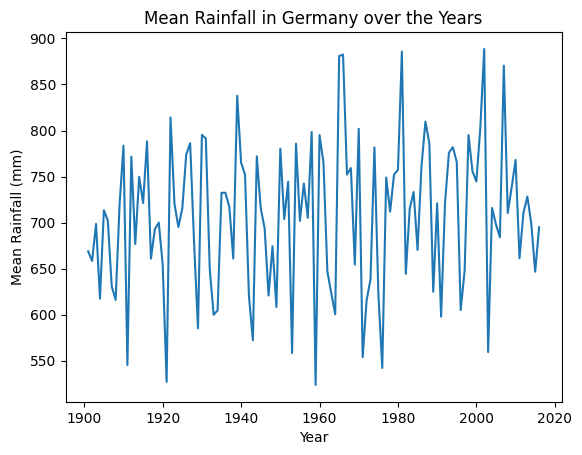

In [54]:
# Plotting mean rainfall for Germany over the years
germany_rainfall = rainfall_df.loc[rainfall_df['Country'] == ' Germany']
germany_rainfall.groupby('Year')['Rainfall (mm)'].mean().plot()

plt.title('Mean Rainfall in Germany over the Years')
plt.xlabel('Year')
plt.ylabel('Mean Rainfall (mm)')
plt.show()


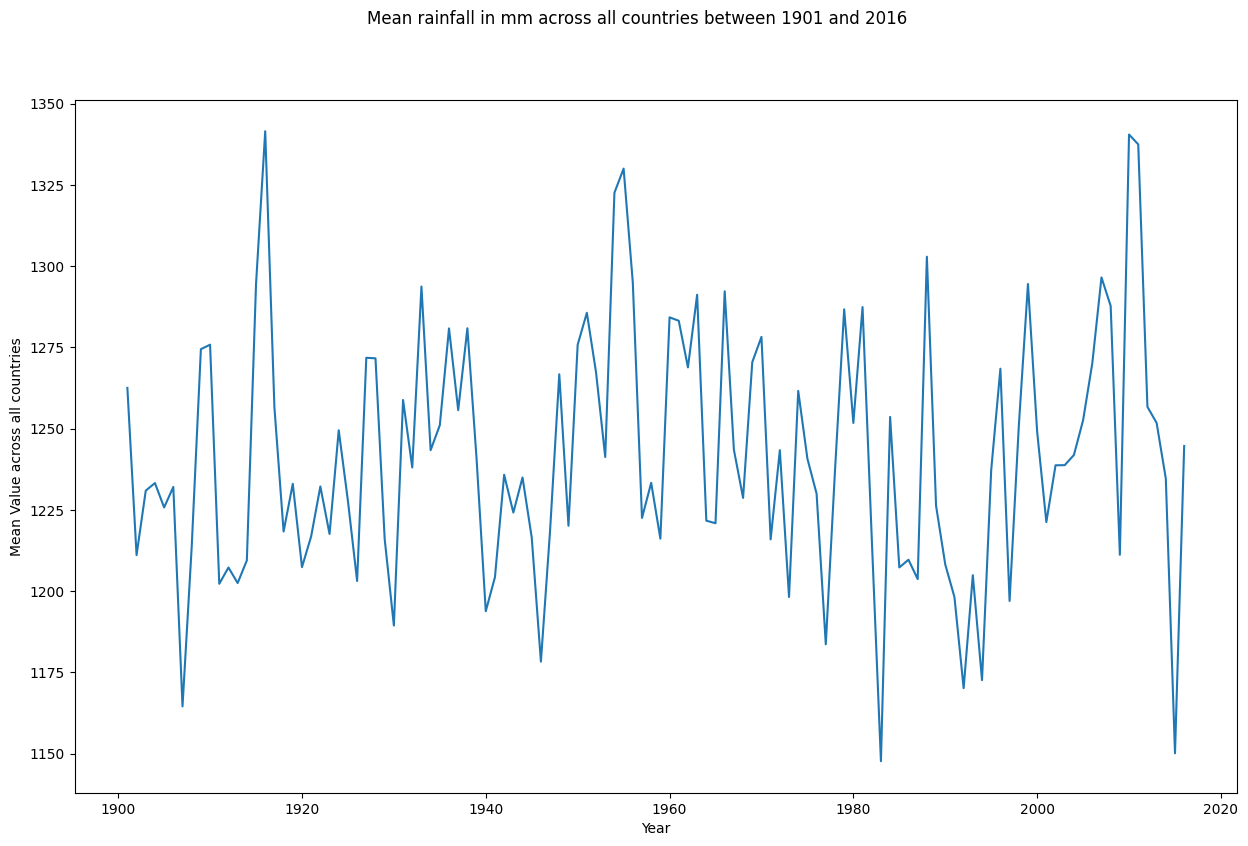

In [56]:
# prepare data
temp_data = rainfall_df.groupby('Year')['Rainfall (mm)'].mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean rainfall in mm across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()


In [70]:
temperature_data = temperature_data.rename(columns={'Temperature - (Celsius)': 'Temperature (Celsius)'})


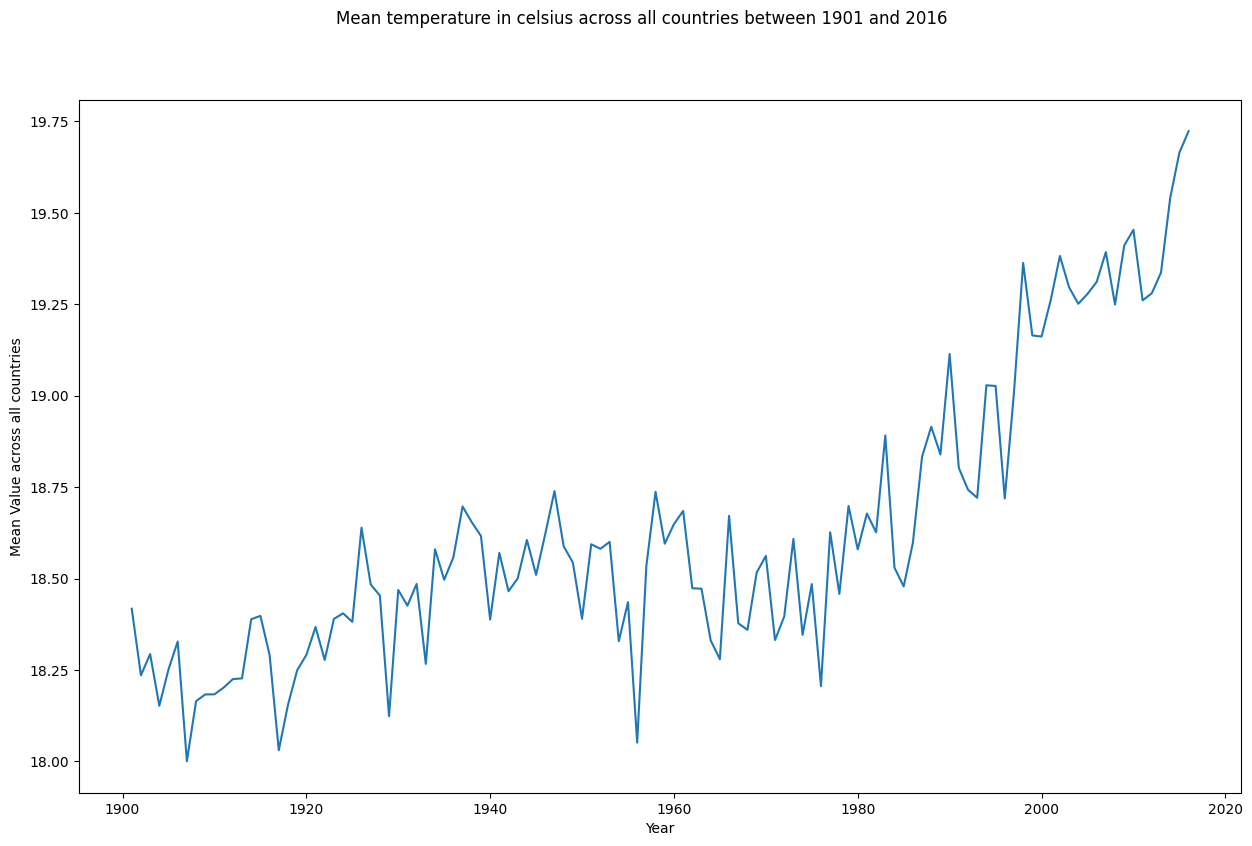

In [72]:
# prepare data
temp_data = temperature_df.groupby('Year')['Temperature (Celsius)'].mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean temperature in celsius across all countries between 1901 and 2016')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

In [74]:
yield_data

,Domain,Area,Element,Item,Year,Unit,Value
0,Crops,Afghanistan,Yield,Barley,1961,hg/ha,10800
1,Crops,Afghanistan,Yield,Barley,1962,hg/ha,10800
2,Crops,Afghanistan,Yield,Barley,1963,hg/ha,10800
3,Crops,Afghanistan,Yield,Barley,1964,hg/ha,10857
4,Crops,Afghanistan,Yield,Barley,1965,hg/ha,10857
...,...,...,...,...,...,...,...
63686,Crops,Zimbabwe,Yield,Wheat,2015,hg/ha,20486
63687,Crops,Zimbabwe,Yield,Wheat,2016,hg/ha,19013
63688,Crops,Zimbabwe,Yield,Wheat,2017,hg/ha,17542
63689,Crops,Zimbabwe,Yield,Wheat,2018,hg/ha,16379


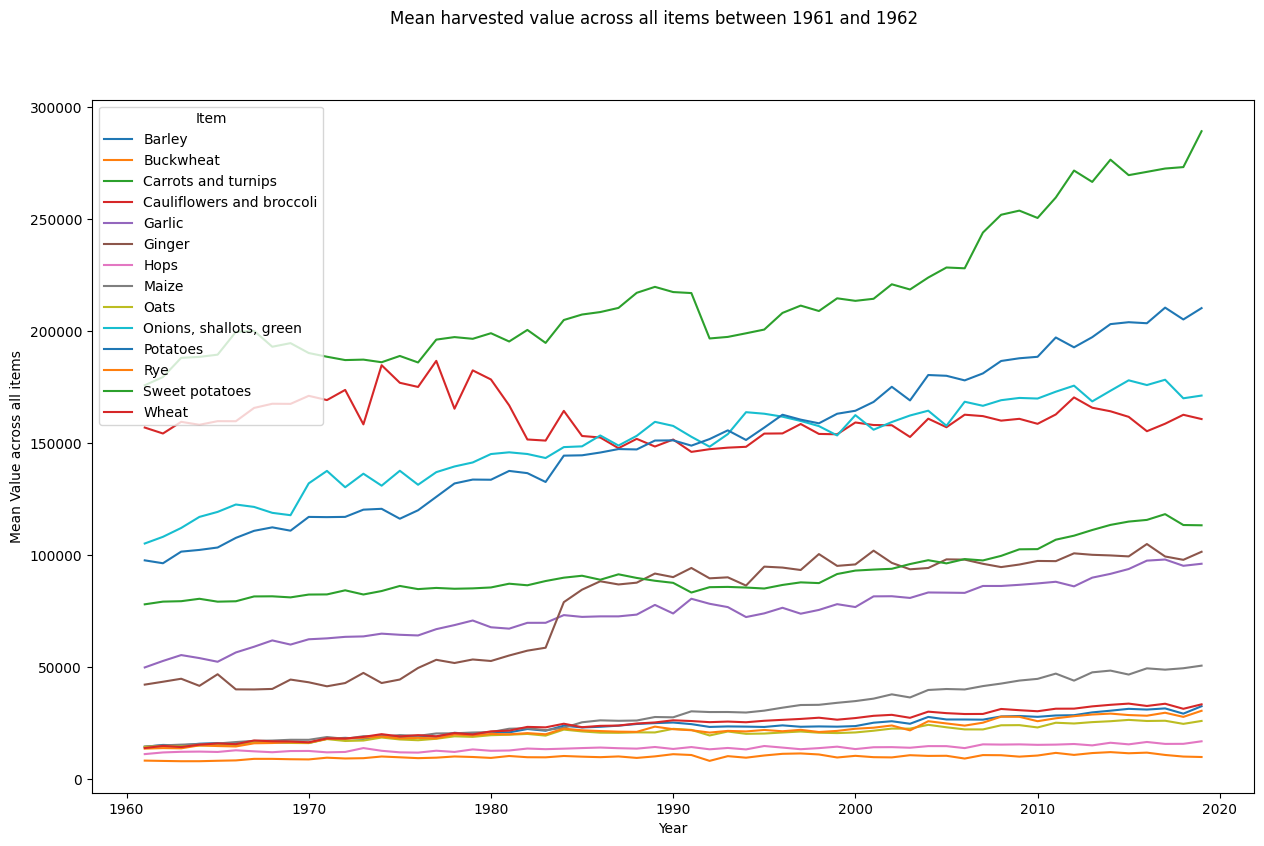

In [77]:
yield_mean = yield_data.groupby(['Year', 'Item'])['Value'].mean().reset_index()

# Plotting
fig, ax = plt.subplots(figsize=(15, 9))
fig.suptitle('Mean harvested value across all items between 1961 and 1962')

# Pivot the dataframe to have items as columns
pivot_yield_mean = yield_mean.pivot(index='Year', columns='Item', values='Value')

pivot_yield_mean.plot(ax=ax)

ax.set_ylabel('Mean Value across all items')
ax.set_xlabel('Year')

plt.show()

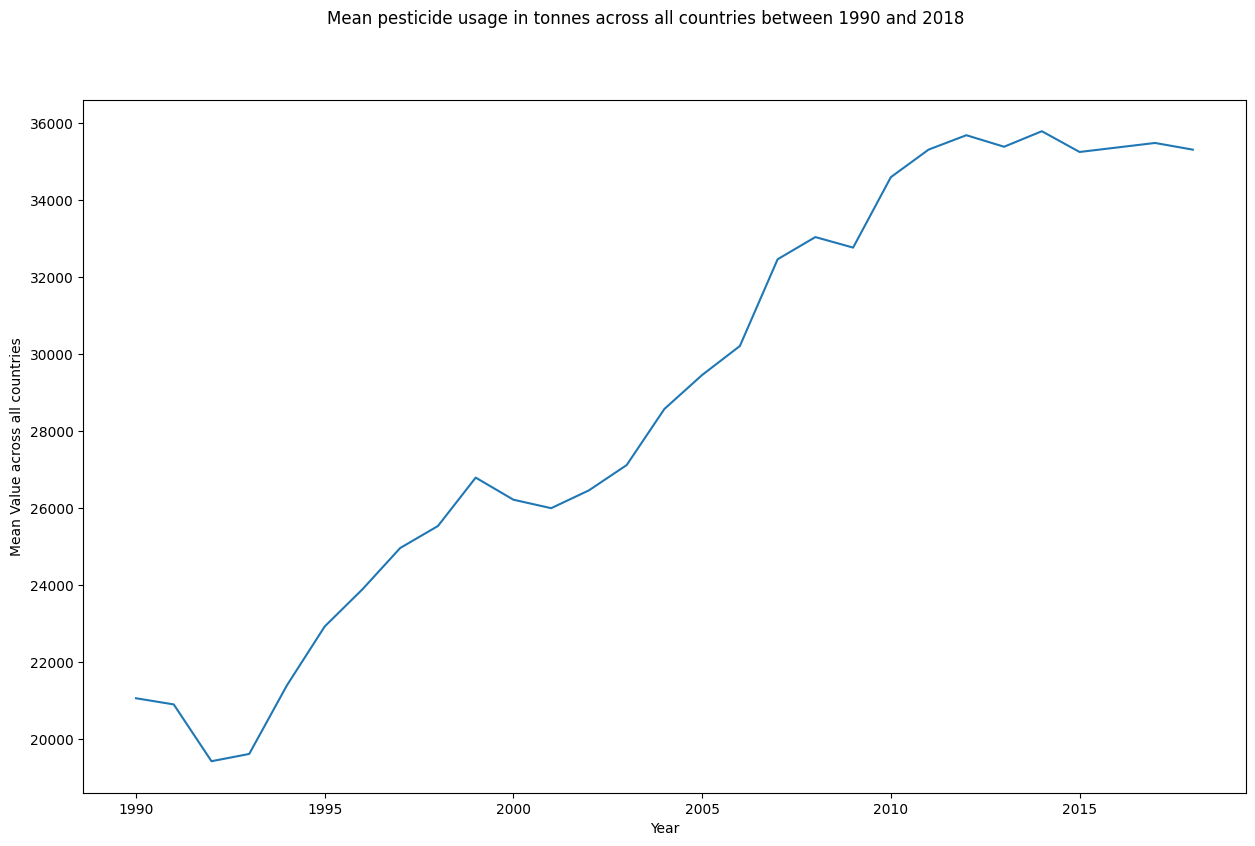

In [79]:
temp_data = pesticides_df.groupby('Year')['Pesticides (tonnes)'].mean()

# plot data
fig, ax = plt.subplots(figsize=(15,9))
fig.suptitle('Mean pesticide usage in tonnes across all countries between 1990 and 2018')

temp_data.plot(ax=ax)

ax.set_ylabel('Mean Value across all countries')
ax.set_xlabel('Year')

plt.show()

In [78]:
pesticides_df

,Country,Year,Pesticides (tonnes)
0,Albania,1990,121
1,Albania,1991,121
2,Albania,1992,121
3,Albania,1993,121
4,Albania,1994,201
...,...,...,...
4784,Zimbabwe,2014,2185
4785,Zimbabwe,2015,2185
4786,Zimbabwe,2016,2185
4787,Zimbabwe,2017,2185
